### Deliverable 1: Preprocessing the Data for a Neural Network

In [32]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
mm_teams_merged_df = pd.read_csv("Data/mm_teams_merged.csv")
mm_teams_merged_df.head()

,Team,Assists Per. Game Rank,Assist Turnover Ratio Rank,BlocksPerGame Rank,Field Goal % Rank,Field Goal % Defense Rank,Fouls Per Game Rank,Free Throw % Rank,Rebound Margin Rank,Scoring Defense Rank,...,Conference_Pac-12,Conference_Patriot,Conference_SEC,Conference_SWAC,Conference_SoCon,Conference_Southland,Conference_Summit League,Conference_Sun Belt,Conference_WAC,Conference_WCC
0,A&M-Corpus Christi,44,141,343,156,90,349,100,51,200,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Akron,278,177,162,70,119,192,272,64,22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Alabama,66,185,36,184,200,304,132,76,320,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arizona,1,17,8,4,10,319,95,9,137,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Arkansas,116,110,71,218,58,323,32,89,145,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Drop the non-beneficial ID columns, 'Team' and 'Tournament Wins'.
X = mm_teams_merged_df.drop(columns=["Team", "Tournament Wins"])
X.head()

,Assists Per. Game Rank,Assist Turnover Ratio Rank,BlocksPerGame Rank,Field Goal % Rank,Field Goal % Defense Rank,Fouls Per Game Rank,Free Throw % Rank,Rebound Margin Rank,Scoring Defense Rank,Scoring Margin Rank,...,Conference_Pac-12,Conference_Patriot,Conference_SEC,Conference_SWAC,Conference_SoCon,Conference_Southland,Conference_Summit League,Conference_Sun Belt,Conference_WAC,Conference_WCC
0,44,141,343,156,90,349,100,51,200,77,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,278,177,162,70,119,192,272,64,22,46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,66,185,36,184,200,304,132,76,320,150,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,17,8,4,10,319,95,9,137,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,116,110,71,218,58,323,32,89,145,53,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
y = mm_teams_merged_df["Tournament Wins"]
y.head()

0    0
1    0
2    0
3    2
4    3
Name: Tournament Wins, dtype: int64

In [35]:
# Determine the number of unique values in each column.
X.nunique()

Assists Per. Game Rank        276
Assist Turnover Ratio Rank    240
BlocksPerGame Rank            281
Field Goal % Rank             250
Field Goal % Defense Rank     243
Fouls Per Game Rank           294
Free Throw % Rank             308
Rebound Margin Rank           261
Scoring Defense Rank          264
Scoring Margin Rank           208
Scoring Offense Rank          259
Steals Per Game Rank          307
Three Pt FG Defense Rank      266
Three Pt FG % Rank            280
Three Pt FG Per Game Rank     294
Turnover Margin Rank          288
Turnover Per Game Rank        276
Win-Loss Rank                 166
Conference_AAC                  2
Conference_ACC                  2
Conference_ASUN                 2
Conference_America East         2
Conference_Atlantic 10          2
Conference_Big 12               2
Conference_Big East             2
Conference_Big Sky              2
Conference_Big South            2
Conference_Big Ten              2
Conference_Big West             2
Conference_C-U

<AxesSubplot:ylabel='Density'>

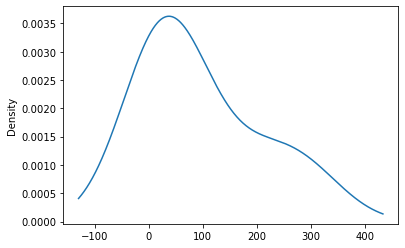

In [36]:
# Visualize the value counts of CLASSIFICATION
mm_teams_merged_df["Tournament Wins"].value_counts().plot.density()

In [37]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, stratify=y)

In [38]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [39]:
X_train_scaled

array([[-1.23395418, -1.11984732,  0.10871923, ..., -0.11855895,
        -0.1268723 , -0.18088625],
       [-0.27193664,  0.08646749,  0.16320832, ..., -0.11855895,
        -0.1268723 , -0.18088625],
       [ 1.3543311 ,  0.03620437,  1.7869833 , ..., -0.11855895,
        -0.1268723 , -0.18088625],
       ...,
       [-0.40936772, -0.99418952,  0.65361016, ..., -0.11855895,
        -0.1268723 , -0.18088625],
       [-0.68422987, -0.73030816,  0.07602577, ..., -0.11855895,
        -0.1268723 , -0.18088625],
       [ 0.51829205,  0.11159905,  0.19590178, ..., -0.11855895,
        -0.1268723 , -0.18088625]])

In [40]:
from sklearn import tree
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [41]:
# Fitting the model
model = model.fit(X_train_scaled, y_train)

In [42]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

In [43]:
# Train the model
fit_model= nn.fit(X_train_scaled, y_train, epochs=100, verbose=1, callbacks=[cp_callback])

NameError: name 'nn' is not defined

In [44]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

ValueError: Shape of passed values is (7, 7), indices imply (2, 2)